# Women's Clothing


Create a function that will analyze the "Review Text" column and calculate a sentiment value. Make a new column in the dataframe that will contain the sentiment value for each review.

HINTS: Don't forget to import all the libraries/functions that you need. Also, before using your created function, remove the missing values from the "Review Text" column.



### Sentiment Analysis

In order to understand how people feel about something, we need to do sentiment analysis on text data that contains their opinion.

The VADER Sentiment Intensity Analyzer returns a score between -1 to 1. Scores closer to -1 have a negative sentiment, scores closer to 1 have a positive sentiment, and scores around 0 are considered neutral.

In [265]:
#initilize function to do sentiment analysis
sid = SentimentIntensityAnalyzer()

In [266]:
#list of english stopwords
eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [267]:
import pandas as pd

#load the data from the Reviews.csv file
# reviews for Girl on the train
filepath = "women_clothing_review.csv"
df = pd.read_csv(filepath, encoding = "latin-1") #this file is encoded differently

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [268]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [269]:
df.dropna(inplace=True)

In [270]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [271]:
#create a function to clean up each review
#then it will analyze and assign a sentiment polarity
def reviewSentiment(review):
    
    #make text lowercase
    review = review.lower()
    
    #tokenize the review
    #tknz_review is alist
    tknz_review = word_tokenize(review)
    
    #remove puntuation
    for token in tknz_review:
        if token in punctuation:
            tknz_review.remove(token)
    
    #empty list to hold "cleaned" tokens
    clean_tokens = []
    
    #remove filler words
    for token in tknz_review:
        if token not in eng_stopwords:
            clean_tokens.append(token)
            
    #put sentence back together with remaining clean words
    clean_review = ' '.join(clean_tokens)
    
    #get the polarity scores dictionary
    sid_rev = sid.polarity_scores(clean_review)
    
    #get sentiment polarity from the "compound" key in the sid_rev dictionary
    r_comp = sid_rev['compound']
    
    #return the sentiment value
    return r_comp

In [272]:
#create a new column to hold sentiment value from function
df['review_sentiment'] = df['Review Text'].apply(reviewSentiment)

In [273]:
#erify sentiment values in new column
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.9153
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.6361


In [274]:
df.dtypes

Unnamed: 0                   int64
Clothing ID                  int64
Age                          int64
Title                       object
Review Text                 object
Rating                       int64
Recommended IND              int64
Positive Feedback Count      int64
Division Name               object
Department Name             object
Class Name                  object
review_sentiment           float64
dtype: object

In [275]:
#create a function to assign a polarity category to the sentiment
def sentimentCategory(sent_num):
    if sent_num >= 0.2:
        return "positive"
    if sent_num <= -0.2:
        return "negative"
    else:
        return "neutral"

In [276]:
#create a new column to hold sentiment category
df['sentiment_category'] = df['review_sentiment'].apply(sentimentCategory)

In [277]:
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment,sentiment_category
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062,positive
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464,positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117,positive


In [278]:
#compare frequency of positive, negative, and neutral reviews
df['sentiment_category'].value_counts()

positive    18596
neutral       614
negative      452
Name: sentiment_category, dtype: int64

In [279]:
df[df['sentiment_category']== 'positive'].head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment,sentiment_category
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062,positive
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464,positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117,positive


In [280]:
df[df['sentiment_category']== 'negative'].head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment,sentiment_category
77,77,850,28,Zipper broke,The zipper broke on this piece the first time ...,2,0,0,General Petite,Tops,Blouses,-0.2263,negative
103,103,822,23,Not a fan,The fabric felt cheap and i didn't find it to ...,2,0,9,General,Tops,Blouses,-0.3724,negative
110,110,861,44,Poor quality,This is so thin and poor quality. especially f...,1,0,11,General Petite,Tops,Knits,-0.3892,negative


### Positive

In [281]:
df['Review Text'].iloc[0]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [282]:
df['review_sentiment'].iloc[0]

0.9062

In [283]:
df['sentiment_category'].iloc[0]

'positive'

### Nagative

In [284]:
df['Review Text'].iloc[79]

"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

In [285]:
df['review_sentiment'].iloc[79]

-0.3724

In [286]:
df['sentiment_category'].iloc[79]

'negative'

### Contradictory?

In [287]:
df['Review Text'].iloc[24]

"The colors weren't what i expected either. the dark blue is much more vibrant and i just couldn't find anything to really go with it. fabric is thick and good quality. has nice weight and movement to it. the skirt just wasn't for me, in the end."

In [288]:
df['review_sentiment'].iloc[24]

0.8442

In [289]:
df['sentiment_category'].iloc[24]

'positive'

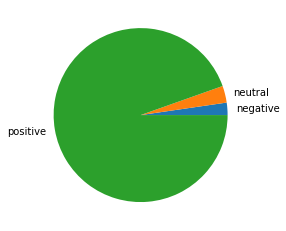

In [295]:
%matplotlib inline
df.groupby(['sentiment_category']).size().plot.pie(label="")

To get clear picture of the neutral and negative catagories let us make a histogram plot. To do so we need to convert the categories into numbers uing the following function. Where we assigned positive =1, negative =-1, and neutral = 0.

In [296]:
#create a function to assign a polarity category to the sentiment
def sentimentCategory_num(sent_num):
    if sent_num == "positive":
        return 1
    if sent_num == "negative":
        return -1
    else:
        return 0

In [297]:
#create a new column to hold sentiment category
df['sentiment_category_num'] = df['sentiment_category'].apply(sentimentCategory_num)

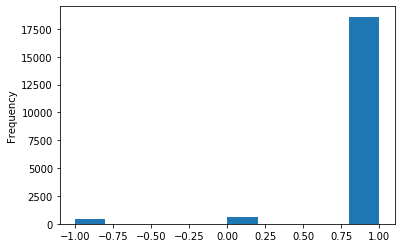

In [298]:
df['sentiment_category_num'].plot(kind='hist')

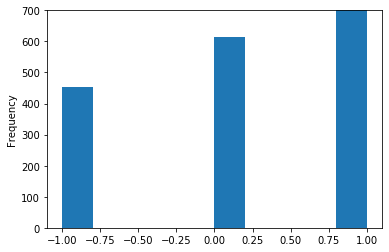

In [299]:
df['sentiment_category_num'].plot(kind='hist', ylim=(0,700))

Overall, it seems that most buyers feel positive.